In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lifestyle-factors-influencing-osteoporosis/osteoporosis.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [34]:
data = pd.read_csv(r"/kaggle/input/lifestyle-factors-influencing-osteoporosis/osteoporosis.csv")

In [35]:
data

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,1991635,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,1528601,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,1990957,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,1779848,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [36]:
data.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [38]:
data.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [39]:
data = data.fillna("NA")

In [40]:
data

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NA,NA,NA,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NA,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NA,Rheumatoid Arthritis,NA,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,1991635,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NA,Yes,0
1954,1528601,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NA,NA,Corticosteroids,No,0
1955,1990957,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NA,Hyperthyroidism,NA,No,0
1956,1779848,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NA,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [41]:
data = data.drop(["Id"] , axis = 1)

In [42]:
data

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NA,NA,NA,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NA,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NA,Rheumatoid Arthritis,NA,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NA,Yes,0
1954,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NA,NA,Corticosteroids,No,0
1955,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NA,Hyperthyroidism,NA,No,0
1956,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NA,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [43]:
data.duplicated().any()

True

In [44]:
data = data.drop_duplicates()

In [45]:
data.duplicated().any()

False

In [46]:
data.columns

Index(['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')

In [47]:
data["Osteoporosis"].value_counts()

Osteoporosis
1    979
0    975
Name: count, dtype: int64

<Axes: xlabel='Osteoporosis', ylabel='count'>

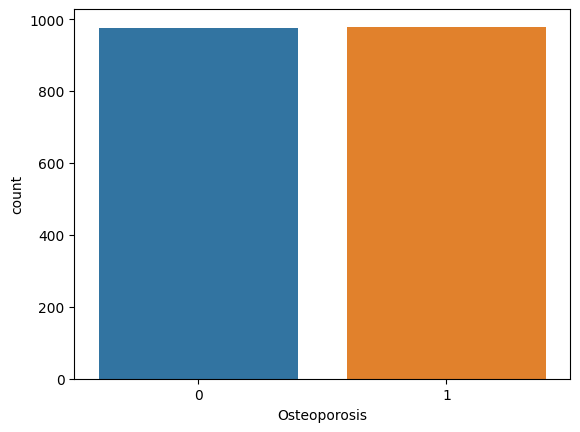

In [48]:
sn.countplot(x = "Osteoporosis" , data = data)

In [49]:
data.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NA,NA,NA,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NA,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NA,Rheumatoid Arthritis,NA,Yes,1


In [50]:
data["Body Weight"].value_counts()

Body Weight
Normal         1026
Underweight     928
Name: count, dtype: int64

<Axes: xlabel='Body Weight', ylabel='count'>

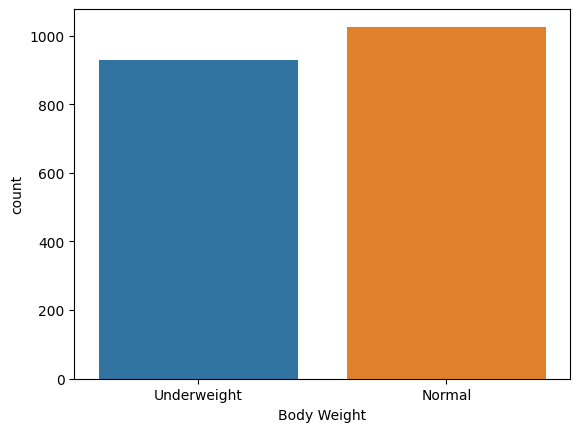

In [51]:
sn.countplot(x = "Body Weight" , data = data)

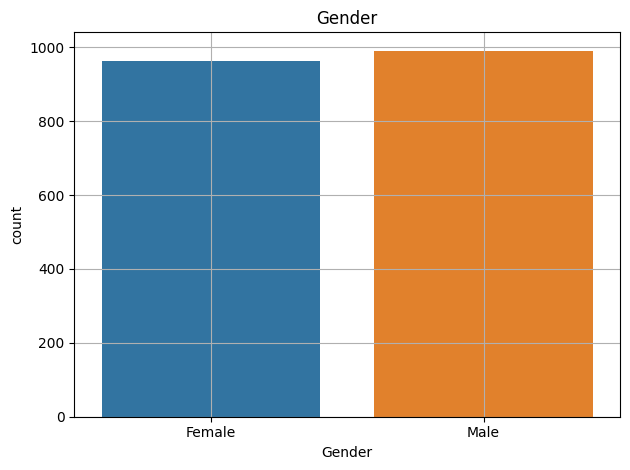

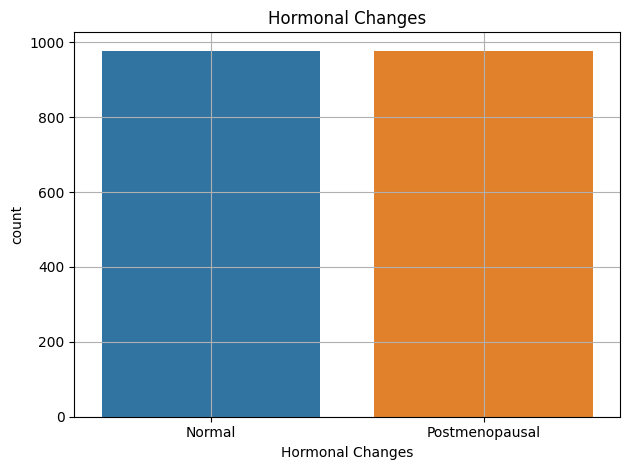

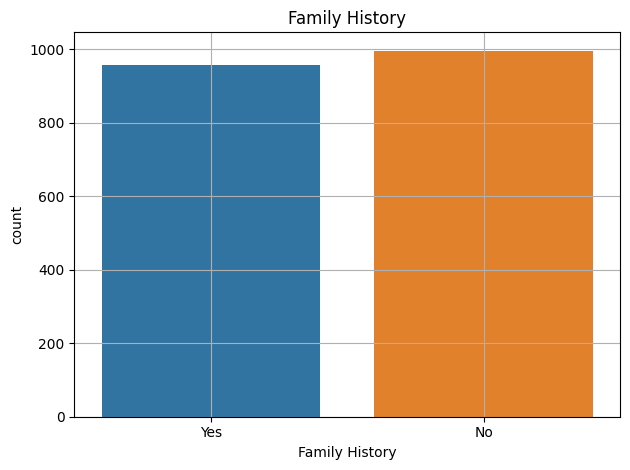

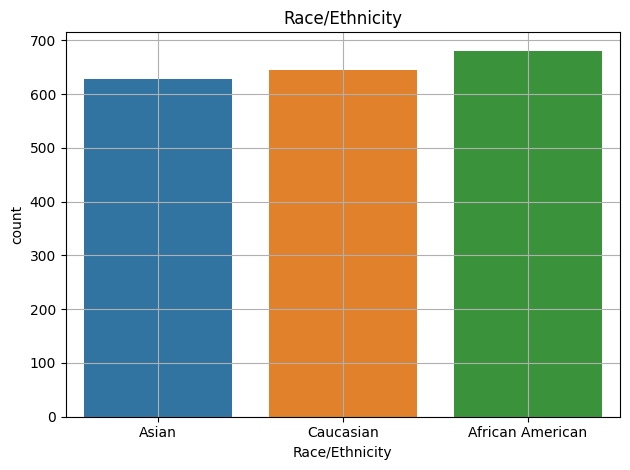

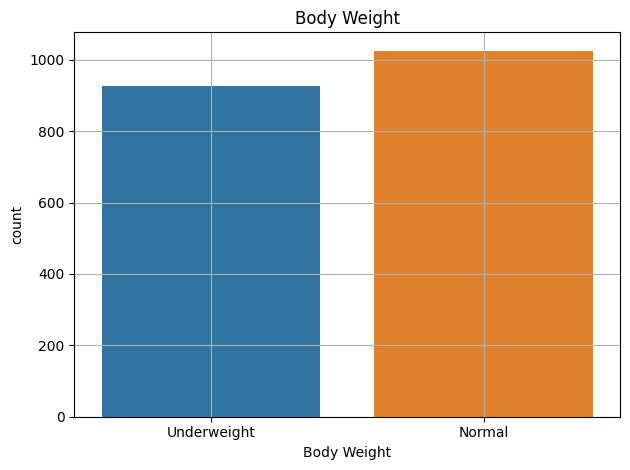

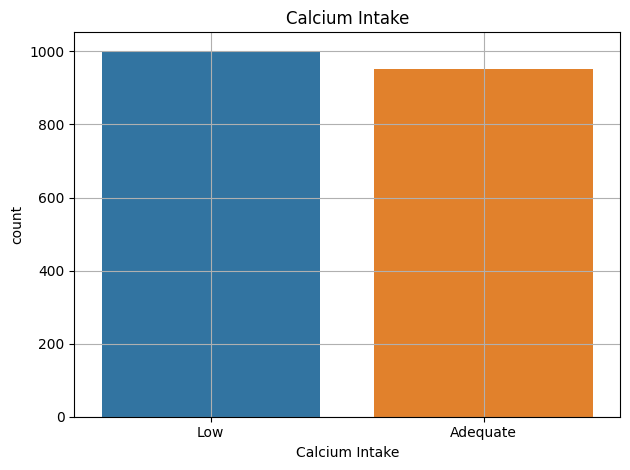

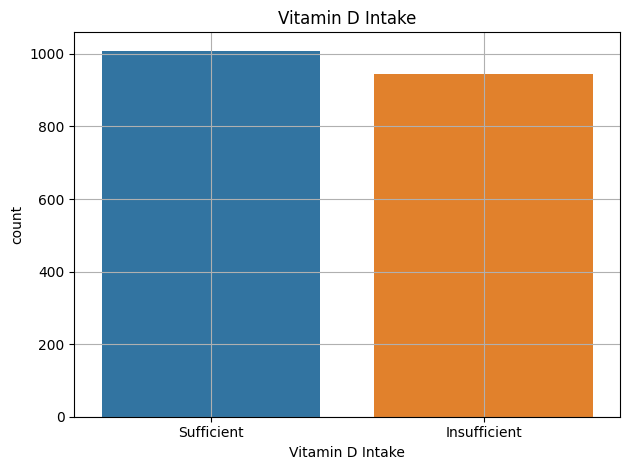

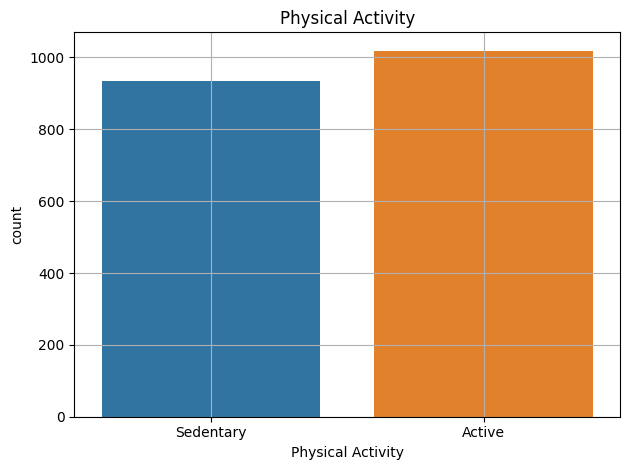

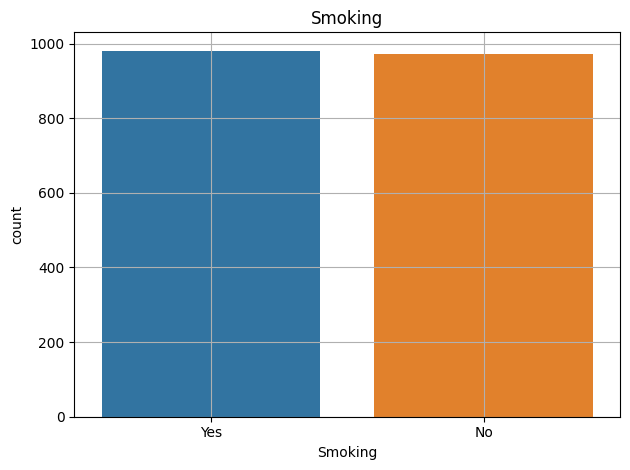

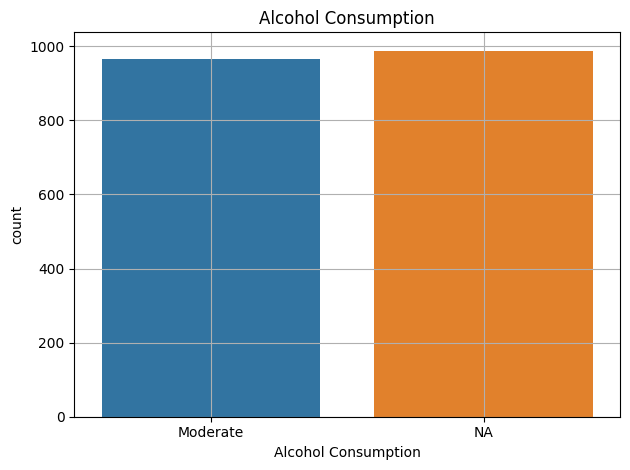

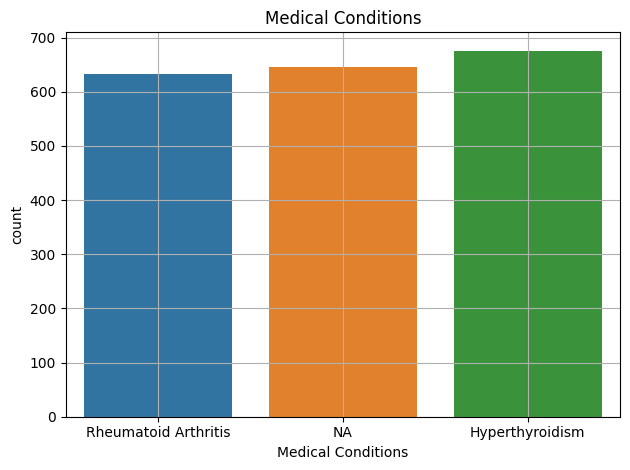

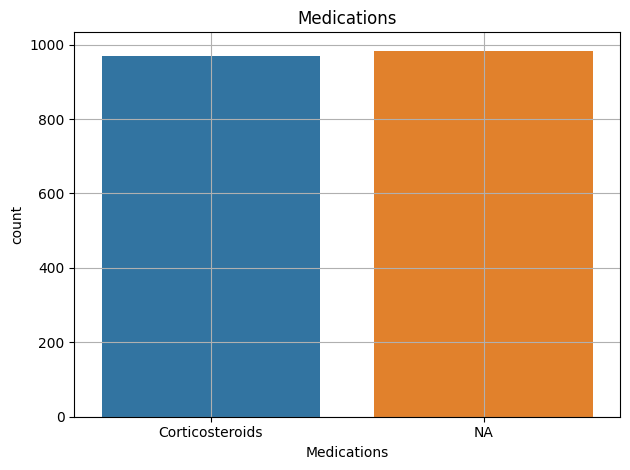

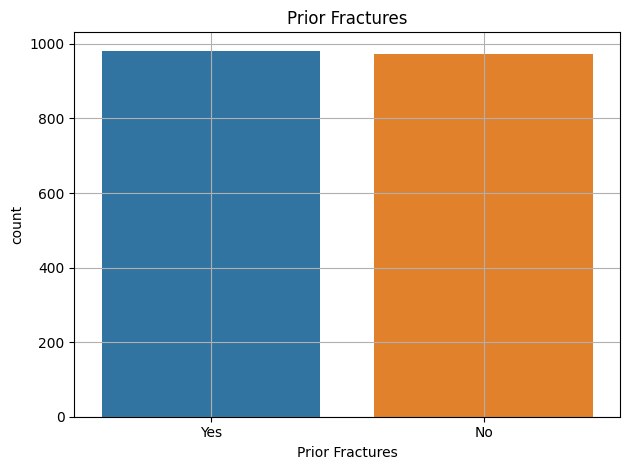

In [52]:
for i in ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures']:
    sn.countplot(x = i , data = data)
    plt.title(i)
    plt.grid()
    plt.tight_layout()
    plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score

In [54]:
data.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NA,NA,NA,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NA,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NA,Rheumatoid Arthritis,NA,Yes,1


In [55]:
data_1 = data.drop(["Age"] , axis = 1)

In [56]:
data_1

,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NA,NA,NA,Yes,1
2,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NA,Rheumatoid Arthritis,Corticosteroids,No,1
4,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NA,Rheumatoid Arthritis,NA,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NA,Yes,0
1954,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NA,NA,Corticosteroids,No,0
1955,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NA,Hyperthyroidism,NA,No,0
1956,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NA,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [57]:
le = LabelEncoder()
data_1 = data_1.apply(le.fit_transform)

In [58]:
data_1

,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,1,1,1,0,0,1,1,0,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0,0,1,0,0,0,1,1,1,0,2,1,1,0
1954,0,1,1,2,1,1,0,0,0,1,1,0,0,0
1955,0,1,0,0,1,1,1,1,0,1,0,1,0,0
1956,1,1,0,0,0,1,0,1,1,1,2,0,1,0


In [59]:
data = data["Age"]

In [60]:
data

0       69
1       32
2       89
3       78
4       38
        ..
1953    19
1954    23
1955    34
1956    25
1957    26
Name: Age, Length: 1954, dtype: int64

In [61]:
data = pd.concat([data , data_1] , axis = 1)

In [62]:
data

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,0,1,0,0,0,1,1,1,0,2,1,1,0
1954,23,0,1,1,2,1,1,0,0,0,1,1,0,0,0
1955,34,0,1,0,0,1,1,1,1,0,1,0,1,0,0
1956,25,1,1,0,0,0,1,0,1,1,1,2,0,1,0


In [63]:
data.corr()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
Age,1.000000,0.014002,0.005086,-0.016992,-0.029247,0.017482,0.002001,0.018547,0.020118,0.027241,-0.005915,0.003443,0.006521,-0.024374,0.690972
Gender,0.014002,1.000000,-0.018411,0.018708,0.015236,0.010969,-0.010607,0.021038,0.026231,-0.039981,0.014171,0.026033,-0.004197,-0.016452,0.011231
Hormonal Changes,0.005086,-0.018411,1.000000,0.019431,-0.033579,-0.007225,-0.015332,0.000034,-0.018485,-0.008184,0.005130,-0.023171,0.001031,0.011264,0.014332
Family History,-0.016992,0.018708,0.019431,1.000000,0.014481,0.002098,0.024052,-0.009605,-0.023380,-0.014253,-0.002852,0.022625,0.007306,-0.005019,-0.002008
Race/Ethnicity,-0.029247,0.015236,-0.033579,0.014481,1.000000,0.007587,0.011762,-0.012945,0.000281,-0.032222,-0.012177,-0.012754,-0.002325,0.000114,-0.006168
Body Weight,0.017482,0.010969,-0.007225,0.002098,0.007587,1.000000,-0.014092,-0.014760,0.020406,0.008404,-0.018908,-0.037049,-0.039610,0.007431,0.036997
Calcium Intake,0.002001,-0.010607,-0.015332,0.024052,0.011762,-0.014092,1.000000,-0.025425,0.011350,-0.034917,-0.013599,0.008823,0.004936,-0.013442,-0.004148
Vitamin D Intake,0.018547,0.021038,0.000034,-0.009605,-0.012945,-0.014760,-0.025425,1.000000,0.033186,0.009083,0.001679,0.010269,0.018199,-0.012457,0.017342
Physical Activity,0.020118,0.026231,-0.018485,-0.023380,0.000281,0.020406,0.011350,0.033186,1.000000,-0.025436,-0.001565,-0.025574,0.035142,-0.048956,0.019553
Smoking,0.027241,-0.039981,-0.008184,-0.014253,-0.032222,0.008404,-0.034917,0.009083,-0.025436,1.000000,-0.004141,0.023254,-0.000029,-0.022539,-0.017409


<Axes: >

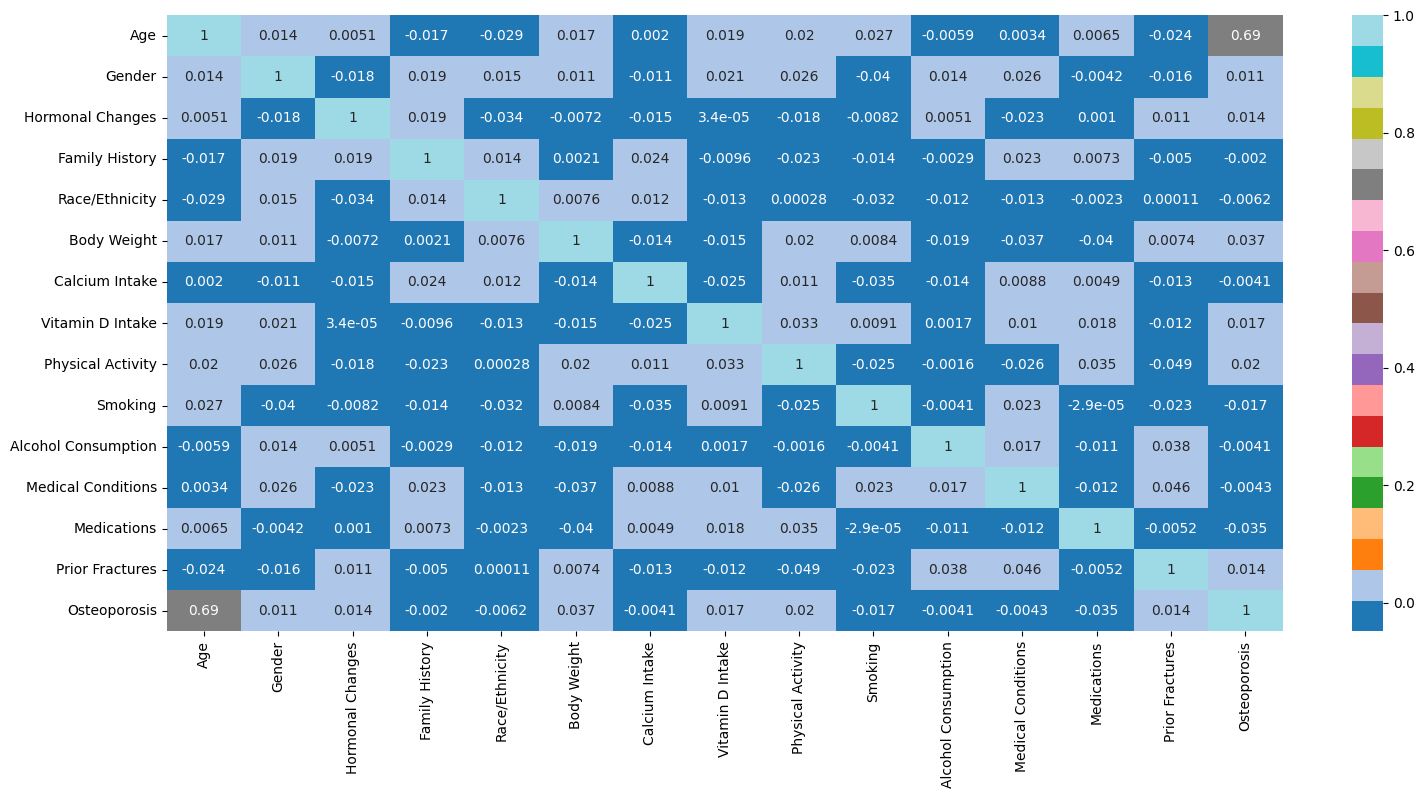

In [66]:
plt.figure(figsize = (18,8))
sn.heatmap(data.corr() , annot = True , cmap = "tab20")

In [67]:
data.describe()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,39.129990,0.507165,0.499488,0.490276,0.981576,0.474923,0.512794,0.516377,0.478506,0.502047,0.505629,0.977994,0.503582,0.502559,0.501024
std,21.365555,0.500077,0.500128,0.500033,0.823781,0.499499,0.499964,0.499860,0.499666,0.500124,0.500096,0.818393,0.500115,0.500121,0.500127
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,53.750000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [71]:
for i in ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures']:
    print("standard_deviation:" , round(data[i].std() , 2))
    print("variance:" , round(data[i].var() , 2))
    

standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.82
variance: 0.68
standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.82
variance: 0.67
standard_deviation: 0.5
variance: 0.25
standard_deviation: 0.5
variance: 0.25


/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


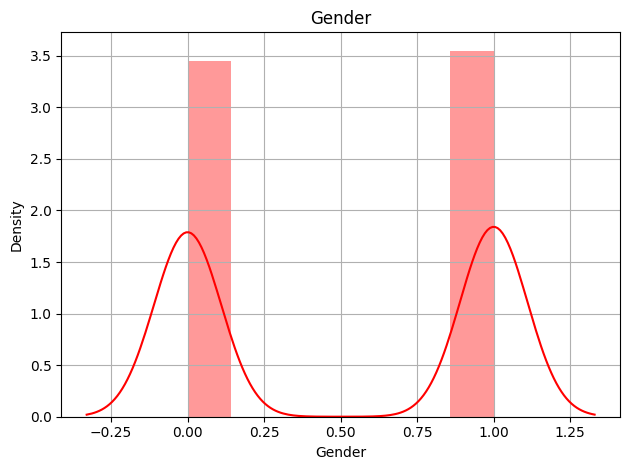

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


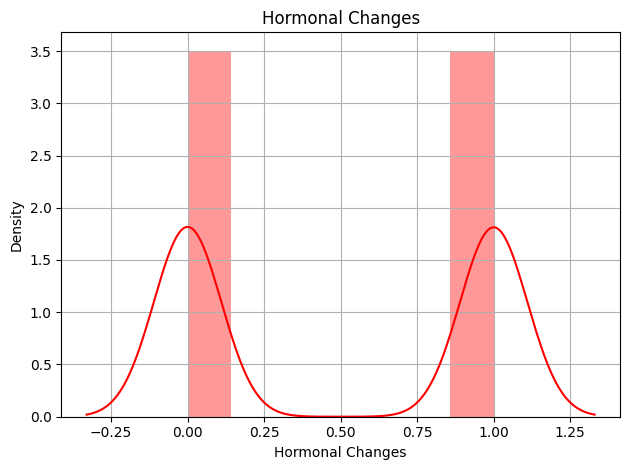

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


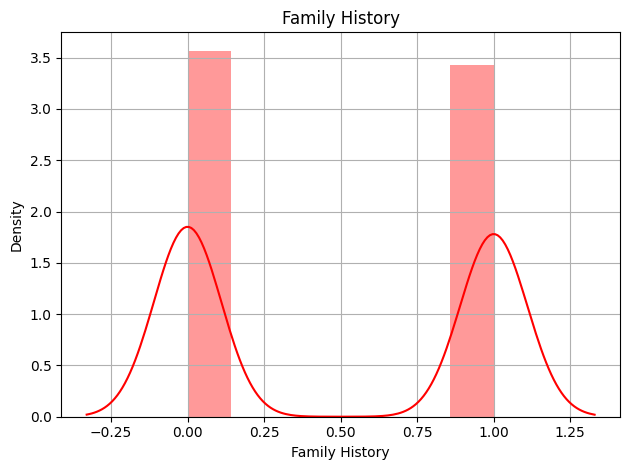

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


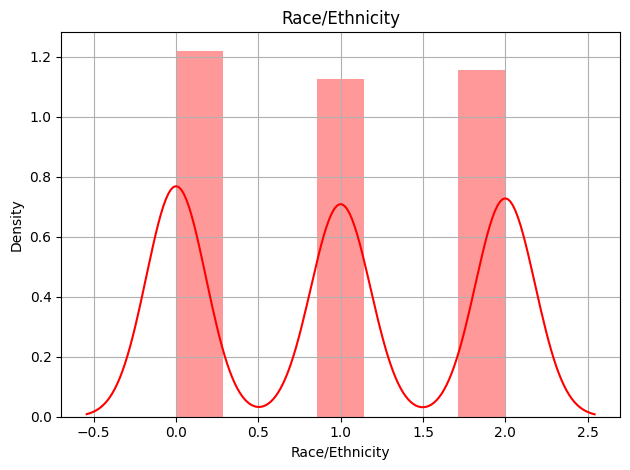

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


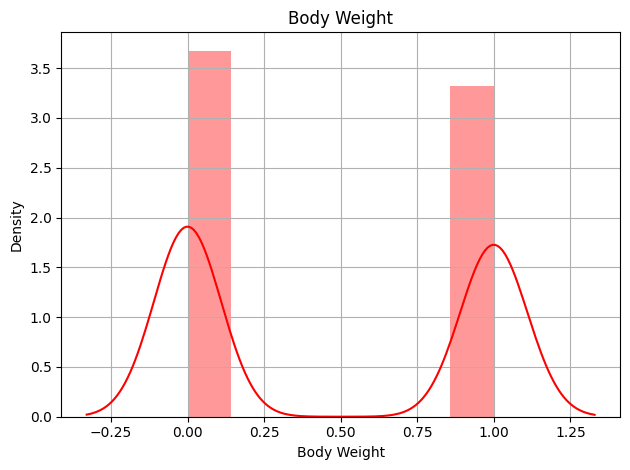

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


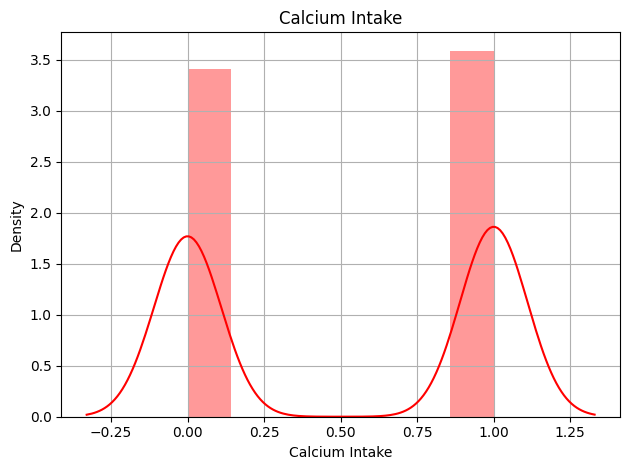

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


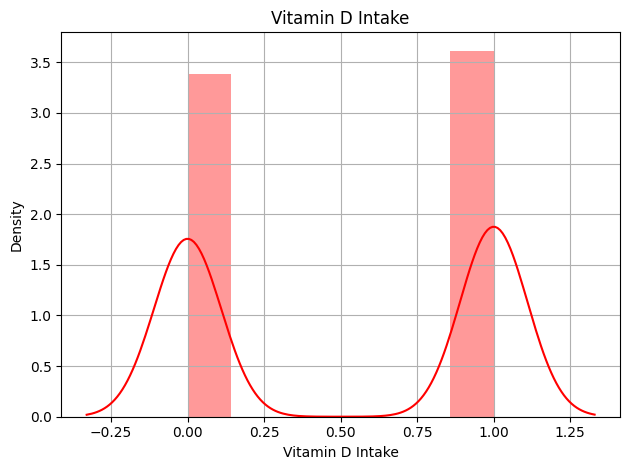

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


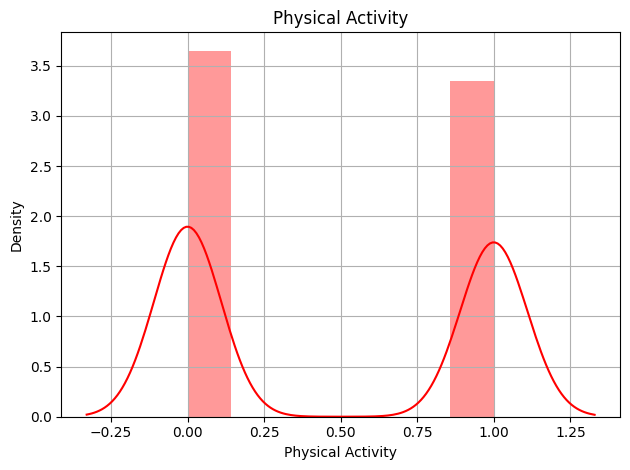

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


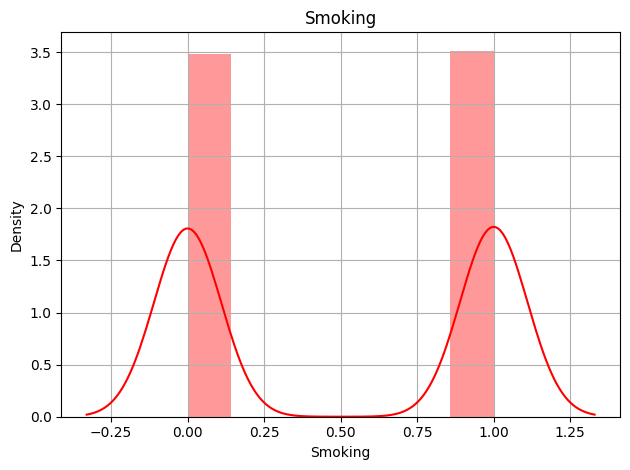

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


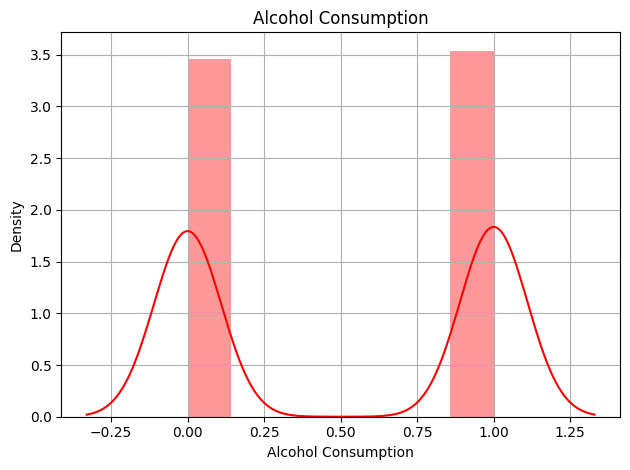

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


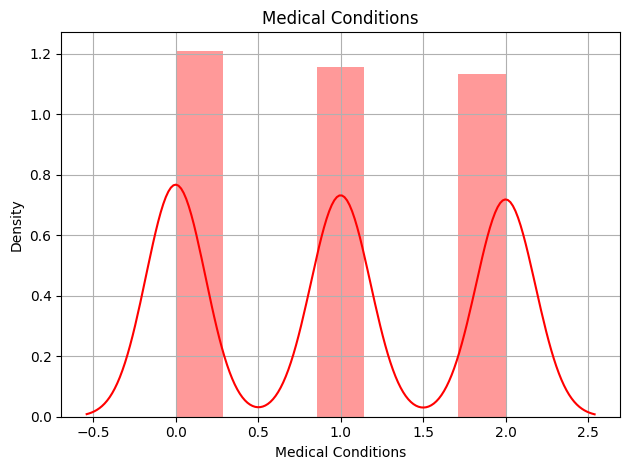

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


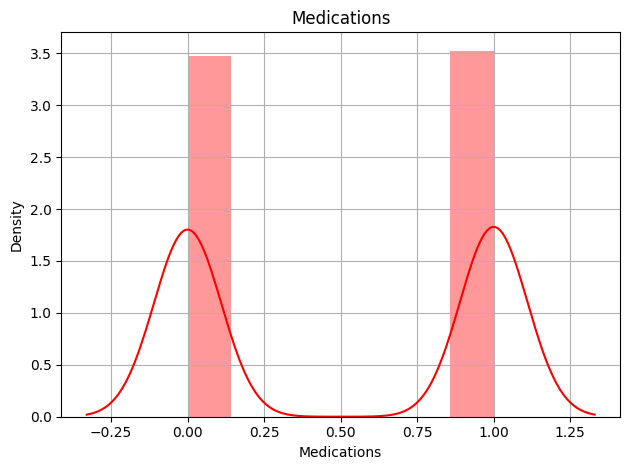

/tmp/ipykernel_34/2853861369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "red")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


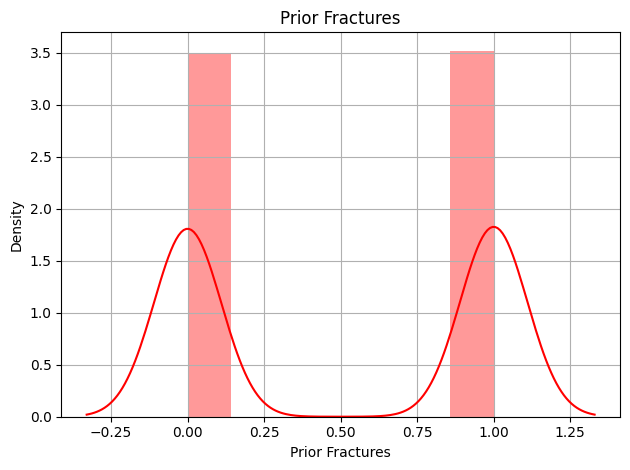

In [72]:
for i in ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures']:
    sn.distplot(data[i] , color = "red")
    plt.title(i)
    plt.grid()
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Figure size 1200x800 with 0 Axes>

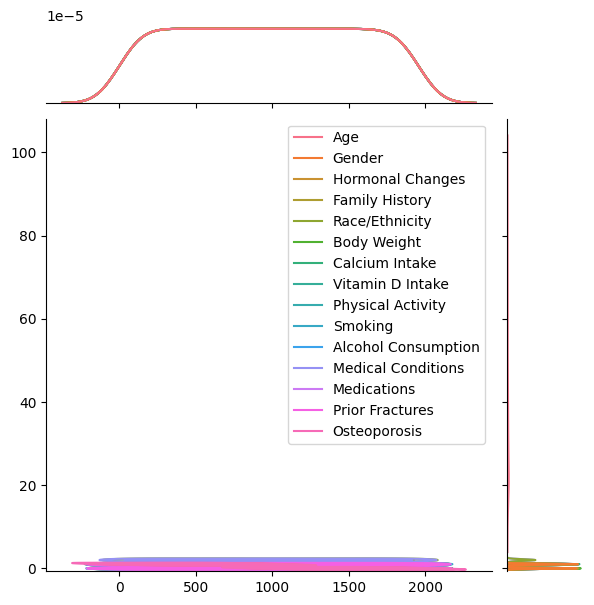

In [73]:
plt.figure(figsize = (12,8))
sn.jointplot(data , kind = "kde")

In [75]:
x = data.drop(["Osteoporosis"] , axis = 1)
y = data["Osteoporosis"]

In [78]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [79]:
x_train.shape , x_test.shape

((1563, 14), (391, 14))

In [80]:
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [81]:
y_pred = model.predict(x_test)

In [82]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [83]:
pd.DataFrame({"y_test":y_test , "y_pred":y_pred})

,y_test,y_pred
1617,0,0
1732,0,0
976,1,1
1057,0,1
307,1,1
...,...,...
426,1,0
900,1,1
1816,0,0
1603,0,0


<Axes: >

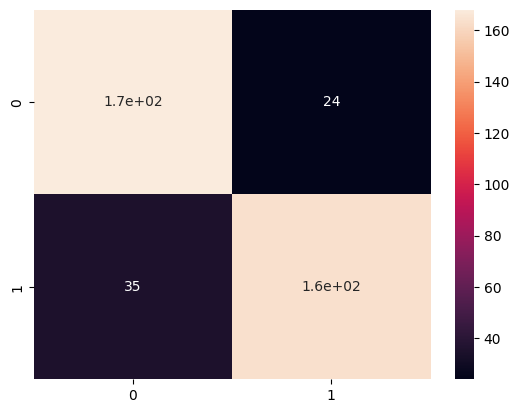

In [87]:
cm = confusion_matrix(y_test , y_pred)
sn.heatmap(cm , annot = True)

In [85]:
accuracy_test = accuracy_score(y_test , y_pred)
print(accuracy_test)

0.8491048593350383


In [88]:
classification_report = classification_report(y_test , y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       192
           1       0.87      0.82      0.85       199

    accuracy                           0.85       391
   macro avg       0.85      0.85      0.85       391
weighted avg       0.85      0.85      0.85       391



In [89]:
from sklearn.metrics import roc_curve , roc_auc_score

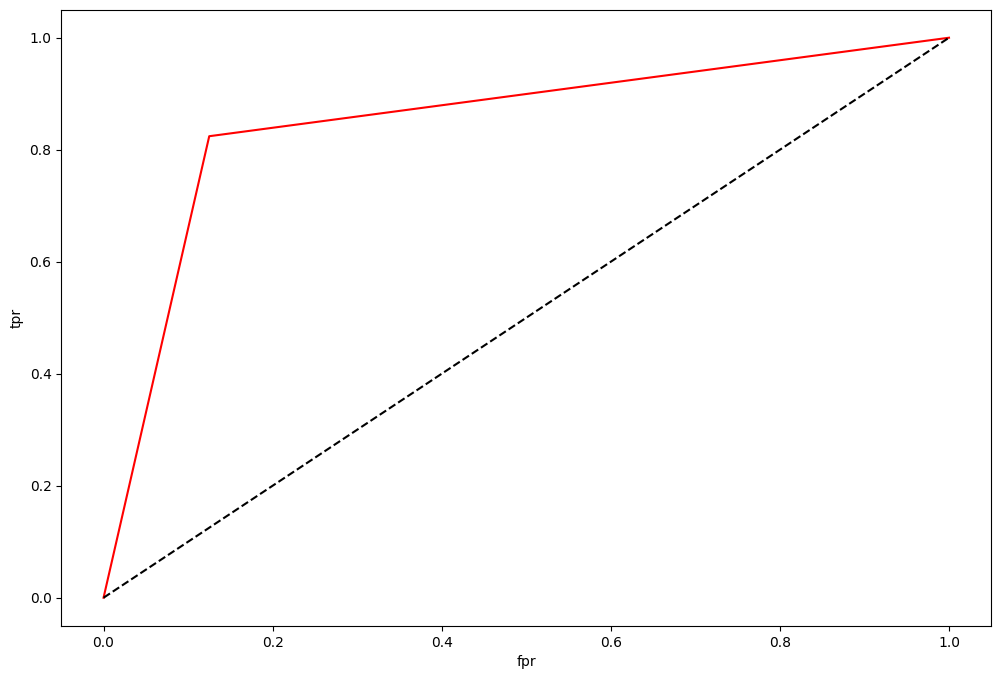

In [94]:
fpr,tpr,_ = roc_curve(y_test , y_pred)
auc = roc_auc_score(y_test , y_pred)
plt.figure(figsize = (12,8))
plt.plot(fpr , tpr ,color = "red", label = "ROC CURVE(AUC = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier , VotingClassifier
from sklearn.model_selection import GridSearchCV

In [103]:
model_tree = DecisionTreeClassifier(criterion = "entropy" , max_depth = 5)
model_tree.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [104]:
y_pred_tree = model_tree.predict(x_test)

In [105]:
y_pred_tree

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [106]:
accuracy_tree = accuracy_score(y_test , y_pred_tree)
print(accuracy_tree)

0.9156010230179028


In [107]:
from sklearn.tree import plot_tree

In [111]:
data.shape

(1954, 15)

[Text(0.5625, 0.9166666666666666, 'x[0] <= 38.5\nentropy = 1.0\nsamples = 1563\nvalue = [783, 780]'),
 Text(0.5267857142857143, 0.75, 'x[0] <= 22.5\nentropy = 0.765\nsamples = 1007\nvalue = [783, 224]'),
 Text(0.2857142857142857, 0.5833333333333334, 'x[0] <= 21.5\nentropy = 0.545\nsamples = 502\nvalue = [439, 63]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[2] <= 0.5\nentropy = 0.512\nsamples = 421\nvalue = [373, 48]'),
 Text(0.07142857142857142, 0.25, 'x[10] <= 0.5\nentropy = 0.575\nsamples = 220\nvalue = [190, 30]'),
 Text(0.03571428571428571, 0.08333333333333333, 'entropy = 0.431\nsamples = 113\nvalue = [103, 10]'),
 Text(0.10714285714285714, 0.08333333333333333, 'entropy = 0.695\nsamples = 107\nvalue = [87, 20]'),
 Text(0.21428571428571427, 0.25, 'x[1] <= 0.5\nentropy = 0.435\nsamples = 201\nvalue = [183, 18]'),
 Text(0.17857142857142858, 0.08333333333333333, 'entropy = 0.323\nsamples = 102\nvalue = [96, 6]'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.533\nsamples = 99\

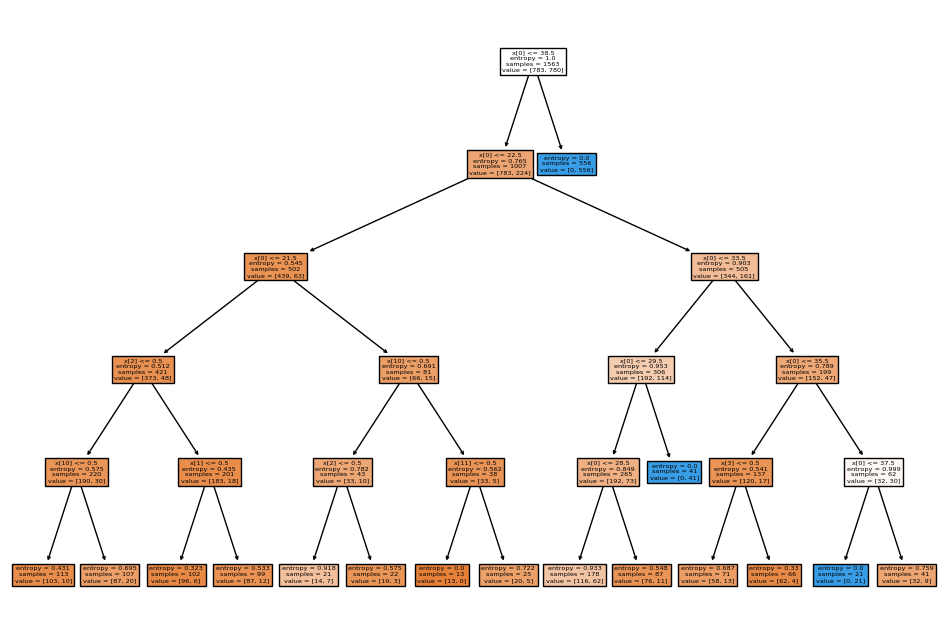

In [109]:
plt.figure(figsize = (12,8))
plot_tree(model_tree , filled = True)

In [113]:
model_forest = RandomForestClassifier(n_estimators = 100 , max_features = 7)

In [114]:
model_forest.fit(x_train , y_train)

RandomForestClassifier(max_features=7)

In [115]:
y_pred_forest = model_forest.predict(x_test)
print(y_pred_forest)

[0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1
 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0
 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0]


In [116]:
accuracy_forest = accuracy_score(y_test , y_pred_forest)
print(accuracy_forest)

0.9028132992327366


In [123]:
model_bagging = BaggingClassifier(base_estimator = model_forest , n_estimators = 50 , random_state = 42)

In [124]:
model_bagging.fit(x_train , y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(max_features=7),
                  n_estimators=50, random_state=42)

In [125]:
y_pred_bagging = model_bagging.predict(x_test)
print(y_pred_bagging)

[0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1
 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0
 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0]


In [126]:
accuracy_bagging = accuracy_score(y_test , y_pred_bagging)
print(accuracy_bagging)

0.9002557544757033


In [127]:
model_voting = VotingClassifier(estimators = [("model_baging",model_bagging),("model_forest",model_forest)])
model_voting.fit(x_train ,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('model_baging',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_features=7),
                                                n_estimators=50,
                                                random_state=42)),
                             ('model_forest',
                              RandomForestClassifier(max_features=7))])

In [128]:
y_pred_voting = model_voting.predict(x_test)
print(y_pred_voting)

[0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1
 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0
 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0]


In [129]:
accuracy_voting = accuracy_score(y_test , y_pred_voting)
print(accuracy_voting)

0.8976982097186701


In [134]:
param_grid = {"n_estimators":[50,100,150,200],
             "min_samples_split":[2,5,10],
             "max_depth":[0,3,5,7,9],
             "max_features":[3,5,7]}

In [135]:
grid_search = GridSearchCV(estimator = model_forest , param_grid = param_grid , cv = 5)
grid_search.fit(x_train , y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ut

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_features=7),
             param_grid={'max_depth': [0, 3, 5, 7, 9],
                         'max_features': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [136]:
print("best hyperparameter:", grid_search.best_params_)

best hyperparameter: {'max_depth': 7, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 50}


In [137]:
best_model = grid_search.best_estimator_

In [139]:
accuracy_score = best_model.score(x_train , y_train)
print('Accuracy on the test set:',accuracy_score)

Accuracy on the test set: 0.8976327575175944


In [140]:
accuracy_bestmodel = best_model.score(x_test , y_test)
print("accuracy_bestmodel:",accuracy_bestmodel)

accuracy_bestmodel: 0.8900255754475703


In [141]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.optimizers import Adam

2024-03-31 08:27:40.155873: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 08:27:40.156013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 08:27:40.326063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [148]:
models = Sequential()
models.add(Dense(15 , input_dim = 14 , activation = "relu"))
models.add(Dense(32 , activation = "relu"))
models.add(Dense(64 , activation = "relu"))
models.add(Dense(64 , activation = "relu"))
models.add(Dense(128 , activation = "relu"))
models.add(Dense(128 , activation = "relu"))
models.add(Dense(64 , activation = "relu"))
models.add(Dense(32 , activation = "relu"))
models.add(Dense(32 , activation = "relu"))
models.add(Dense(8 , activation = "relu"))
models.add(Dense(1 , activation = "sigmoid"))

In [149]:
models.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [150]:
history = models.fit(x_train , y_train , epochs = 100 , batch_size = 10 , validation_split = 0.30)

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5842 - loss: 0.5963 - val_accuracy: 0.7740 - val_loss: 0.4705
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.4311 - val_accuracy: 0.8124 - val_loss: 0.4406
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8210 - loss: 0.4021 - val_accuracy: 0.8124 - val_loss: 0.4060
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8228 - loss: 0.3947 - val_accuracy: 0.8230 - val_loss: 0.3837
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8288 - loss: 0.3930 - val_accuracy: 0.8060 - val_loss: 0.4019
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8365 - loss: 0.3569 - val_accuracy: 0.8273 - val_loss: 0.3736
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8361 - loss: 0.3544 - val_accuracy: 0.8166 - val_loss: 0.4090
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8316 - loss: 0.3663 - val_accu

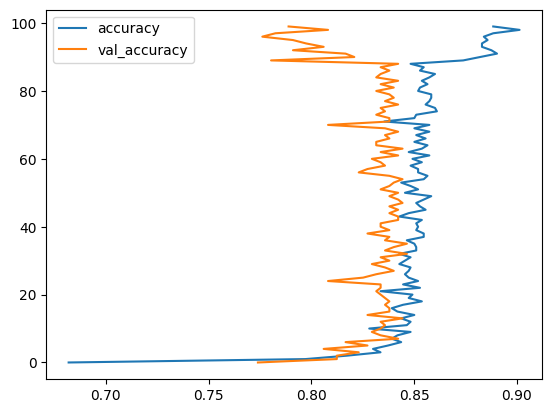

In [158]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(len(acc))
plt.plot(acc , epochs ,label = 'accuracy')
plt.plot(val_acc , epochs , label = "val_accuracy")
plt.legend()
plt.show()

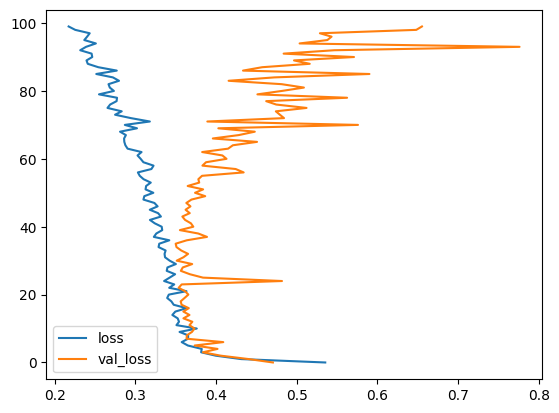

In [159]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(loss))
plt.plot(loss , epochs , label = "loss")
plt.plot(val_loss , epochs , label = "val_loss")
plt.legend()
plt.show()

In [166]:
input_values = np.array([[0,1,0,1,0,1,0,1,0,1,1,1,0,0]])

In [167]:
input_values

array([[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]])

In [173]:

label = {"No-osteoporosis":0 , "osteoporosis":1}
print(label)

{'No-osteoporosis': 0, 'osteoporosis': 1}


In [174]:
model_forest.predict(input_values)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [160]:
data.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1
